In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

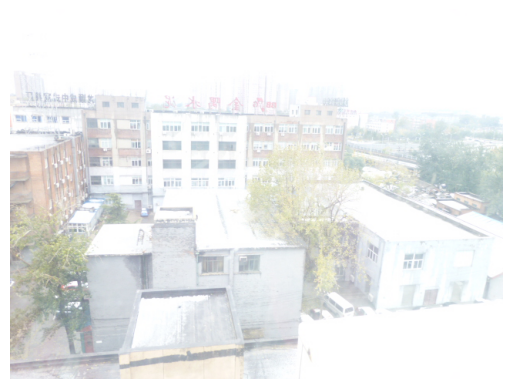

In [2]:
imgs = cv2.imread('sample_images/sample01.jpg')
if imgs is None:
    print("Error: Unable to load image")
    exit()
img = cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
type(img)
img.shape

(480, 640, 3)

In [4]:
def hist_equal(imgn):
    normalized = []
    n, bins, patches = plt.hist(imgn)
    for i in range(bins):
        normalized.append(n[i]/sum(n))

    normalized[0] *= bins-1
    for i in range(1,bins):
        normalized[i] = normalized[i]*(bins-1) + normalized[i-1]
        normalized[i-1] = round(normalized[i-1])
    normalized[bins-1] = round(normalized[i-1])

In [5]:
def lab(img):
    lab_img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab_img)
    # a_rgb = 
    # plt.figure(figsize=(10, 6))
    #
    # plt.subplot(2, 2, 1)
    # plt.imshow(img)
    # plt.title('original')
    # plt.axis('off')
    #
    # plt.subplot(2, 2, 2)
    # plt.imshow(l, cmap='gray')
    # plt.title('L Channel')
    # plt.axis('off')
    #
    # # Plot the A channel
    # plt.subplot(2, 2, 3)
    # plt.imshow(a, cmap='gray')
    # plt.title('A Channel')
    # plt.axis('off')
    #
    # # Plot the B channel
    # plt.subplot(2, 2, 4)
    # plt.imshow(b, cmap='gray')
    # plt.title('B Channel')
    # plt.axis('off')
    #
    # plt.tight_layout()
    # plt.show()
    return l, a, b
l,a,b = lab(img)

In [6]:
def he(img):
    s = np.shape(img)
    img = np.reshape(img, s[0]*s[1])
    bins = range(257)
    bins = np.array(bins) - 0.5
    counts, bins = np.histogram(img, bins = bins)
    pdf = counts / counts.sum()
    cdf = np.zeros(256)
    for i in range(256):
        cdf[i] = cdf[max(0,i-1)] + pdf[i]
    cdf = cdf * 255
    cdf = np.round(cdf)
    return cdf
        
normalized_l = he(l)
print(normalized_l)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   1.   1.   1.   1.   1.   1.   1.   2.   2.   2.   2.
   2.   3.   3.   3.   3.   4.   4.   4.   5.   5.   6.   6.   6.   7.
   7.   8.   9.   9.  10.  11.  11.  12.  13.  13.  14.  15.  16.  17.
  18. 

(-0.5, 639.5, 479.5, -0.5)

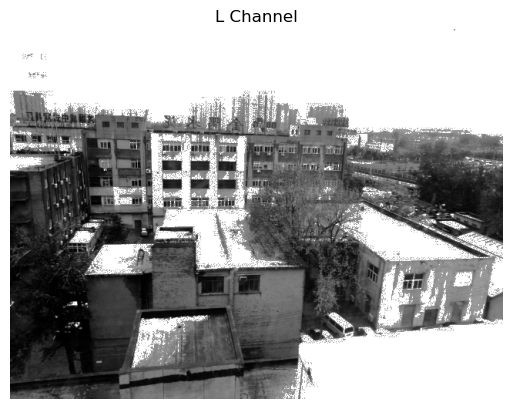

In [7]:
def apply(channel, normal):
    res = np.zeros(np.shape(channel))
    sh = np.shape(channel)
    for i in range(sh[0]):
        for j in range(sh[1]):
            res[i][j] = normal[channel[i][j]]
    return res
res = apply(l, normalized_l)
plt.imshow(res, cmap='gray')
plt.title('L Channel')
plt.axis('off')

In [8]:
def resize(arr, shape):
    if arr.shape != shape:
        arr = cv2.resize(arr, (shape[0], shape[1]))
    return arr.astype(np.uint8)

In [9]:
def lab_he(_img):
    _l, _a, _b = lab(_img)
    normalized = he(_l)
    _res = apply(_l, normalized)
    img_shape = _img.shape[:2]
    _res = resize(_res, img_shape)
    _a = resize(_a, img_shape)
    _b = resize(_b, img_shape)
    return _res, _a, _b

(-0.5, 639.5, 479.5, -0.5)

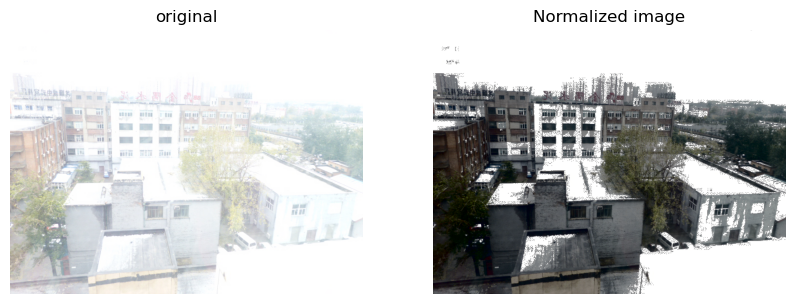

In [10]:
res = cv2.resize(res, (a.shape[1], a.shape[0]))
b = cv2.resize(b, (a.shape[1], a.shape[0]))
res = res.astype(np.uint8)
lab_image = cv2.merge([res, a, b])
rgb_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
# a_rgb = 
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rgb_image)
plt.title('Normalized image')
plt.axis('off')

Adaptive histogram equalization

In [11]:
def ahe(_img, _kernel_size=(16,16)):
    shape = _img.shape
    h = math.ceil(shape[0]/_kernel_size[0])
    w = math.ceil(shape[1]/_kernel_size[1])
    _res = np.zeros(shape, dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            _l, _a, _b = lab_he(_img[i*_kernel_size[0]:min((i+1)*_kernel_size[0], shape[0]), j*_kernel_size[1]:min((j+1)*_kernel_size[1], shape[1]), :])
            _res[i*_kernel_size[0]:min((i+1)*_kernel_size[0], shape[0]), j*_kernel_size[1]:min((j+1)*_kernel_size[1], shape[1]), :] = cv2.merge([_l, _a, _b])
    return _res

(-0.5, 639.5, 479.5, -0.5)

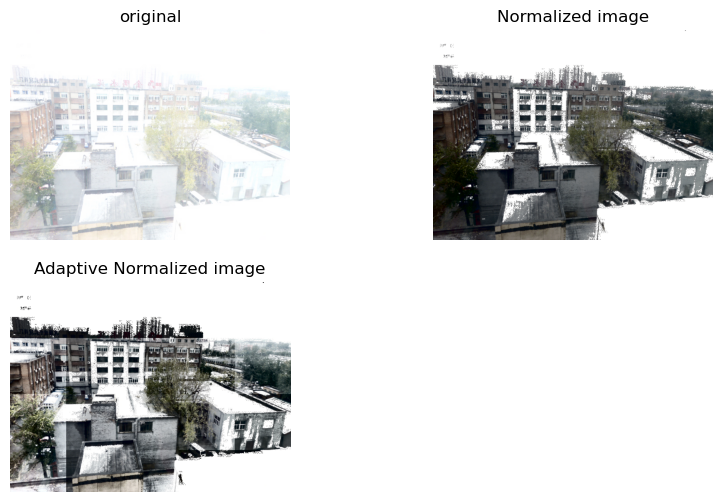

In [12]:
ahe_img = ahe(img, (128, 128))
ahe_img = cv2.cvtColor(ahe_img, cv2.COLOR_LAB2BGR)
ahe_img = cv2.cvtColor(ahe_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rgb_image)
plt.title('Normalized image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(ahe_img)
plt.title('Adaptive Normalized image')
plt.axis('off')

In [13]:
def conv_ahe(_img, _kernel_size=(16,16)):
    shape = _img.shape
    count = np.zeros(shape)
    _res = np.zeros(shape)
    h = shape[0] - _kernel_size[0] + 1
    w = shape[1] - _kernel_size[1] + 1
    for i in tqdm(range(h)):
        for j in range(w):
            _l, _a, _b = lab_he(_img[i:i + _kernel_size[0], j:j + _kernel_size[1], :])
            _res[i:i + _kernel_size[0], j:j + _kernel_size[1], :] += cv2.merge([_l, _a, _b])
            count[i:i + _kernel_size[0], j:j + _kernel_size[1], :] += 1
    _res = _res/count
    return _res.astype(np.uint8)

100%|██████████| 417/417 [04:40<00:00,  1.48it/s]


(-0.5, 639.5, 479.5, -0.5)

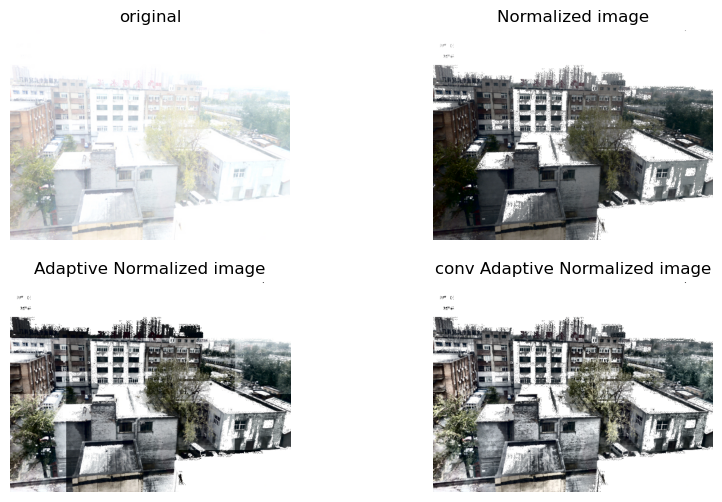

In [14]:
conv_ahe_img = conv_ahe(img, (64, 64))
conv_ahe_img = cv2.cvtColor(conv_ahe_img, cv2.COLOR_LAB2BGR)
conv_ahe_img = cv2.cvtColor(conv_ahe_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(rgb_image)
plt.title('Normalized image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(ahe_img)
plt.title('Adaptive Normalized image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(conv_ahe_img)
plt.title('conv Adaptive Normalized image')
plt.axis('off')

In [78]:
# conv_ahe_img_2 = conv_ahe(img, (32, 32))
# conv_ahe_img_2 = cv2.cvtColor(conv_ahe_img_2, cv2.COLOR_LAB2BGR)
# conv_ahe_img_2 = cv2.cvtColor(conv_ahe_img_2, cv2.COLOR_BGR2RGB)

100%|██████████| 449/449 [01:45<00:00,  4.25it/s]


In [79]:
# ahe_img_2 = ahe(img, (32, 32))
# ahe_img_2 = cv2.cvtColor(ahe_img_2, cv2.COLOR_LAB2BGR)
# ahe_img_2 = cv2.cvtColor(ahe_img_2, cv2.COLOR_BGR2RGB)

(-0.5, 639.5, 479.5, -0.5)

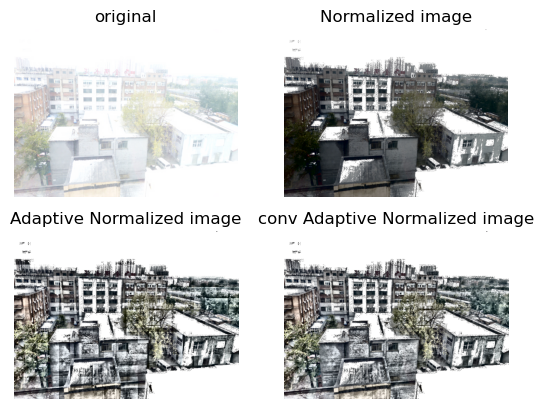

In [80]:
# plt.subplot(2, 2, 1)
# plt.imshow(img)
# plt.title('original')
# plt.axis('off')
#
# plt.subplot(2, 2, 2)
# plt.imshow(rgb_image)
# plt.title('Normalized image')
# plt.axis('off')
#
# plt.subplot(2, 2, 3)
# plt.imshow(ahe_img_2)
# plt.title('Adaptive Normalized image')
# plt.axis('off')
#
# plt.subplot(2, 2, 4)
# plt.imshow(conv_ahe_img_2)
# plt.title('conv Adaptive Normalized image')
# plt.axis('off')

100%|██████████| 433/433 [03:03<00:00,  2.36it/s]


(-0.5, 639.5, 479.5, -0.5)

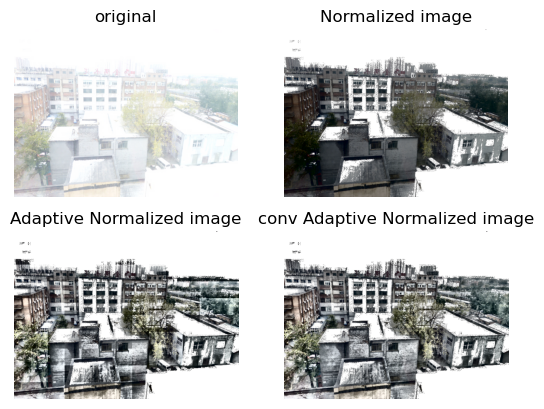

In [81]:
# conv_ahe_img_3 = conv_ahe(img, (48, 48))
# conv_ahe_img_3 = cv2.cvtColor(conv_ahe_img_3, cv2.COLOR_LAB2BGR)
# conv_ahe_img_3 = cv2.cvtColor(conv_ahe_img_3, cv2.COLOR_BGR2RGB)
# ahe_img_3 = ahe(img, (48, 48))
# ahe_img_3 = cv2.cvtColor(ahe_img_3, cv2.COLOR_LAB2BGR)
# ahe_img_3 = cv2.cvtColor(ahe_img_3, cv2.COLOR_BGR2RGB)
# plt.subplot(2, 2, 1)
# plt.imshow(img)
# plt.title('original')
# plt.axis('off')
#
# plt.subplot(2, 2, 2)
# plt.imshow(rgb_image)
# plt.title('Normalized image')
# plt.axis('off')
#
# plt.subplot(2, 2, 3)
# plt.imshow(ahe_img_3)
# plt.title('Adaptive Normalized image')
# plt.axis('off')
#
# plt.subplot(2, 2, 4)
# plt.imshow(conv_ahe_img_3)
# plt.title('conv Adaptive Normalized image')
# plt.axis('off')

100%|██████████| 381/381 [10:14<00:00,  1.61s/it]


(-0.5, 639.5, 479.5, -0.5)

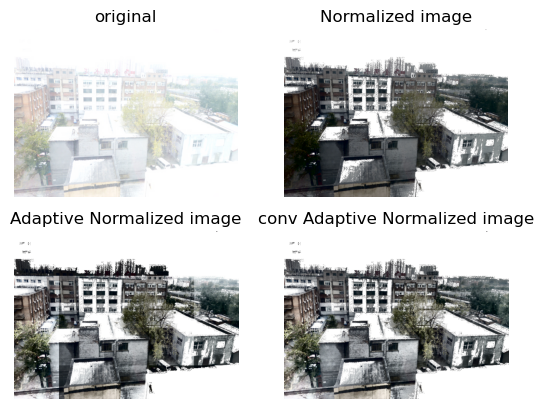

In [82]:
# conv_ahe_img_4 = conv_ahe(img, (100, 100))
# conv_ahe_img_4 = cv2.cvtColor(conv_ahe_img_4, cv2.COLOR_LAB2BGR)
# conv_ahe_img_4 = cv2.cvtColor(conv_ahe_img_4, cv2.COLOR_BGR2RGB)
# plt.subplot(2, 2, 1)
# plt.imshow(img)
# plt.title('original')
# plt.axis('off')
#
# plt.subplot(2, 2, 2)
# plt.imshow(rgb_image)
# plt.title('Normalized image')
# plt.axis('off')
#
# plt.subplot(2, 2, 3)
# plt.imshow(ahe_img)
# plt.title('Adaptive Normalized image')
# plt.axis('off')
#
# plt.subplot(2, 2, 4)
# plt.imshow(conv_ahe_img_4)
# plt.title('conv Adaptive Normalized image')
# plt.axis('off')

weighted sum

In [27]:
def display(images, names):
    no = len(images)
    row = math.ceil(no/2)
    for i in range(no):
        plt.subplot(row, 2, i+1)
        plt.imshow(images[i])
        plt.title(names[i])
        plt.axis('off')

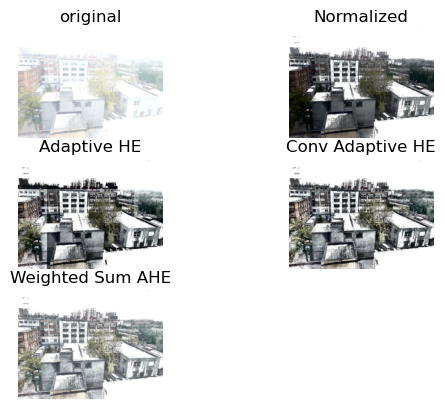

In [30]:
def l_weighted_sum(_origin, _processed, ratio=0.5):
    _l, _a, _b = lab(_origin)
    _L, _A, _B = lab(_processed)
    ll = (_l*(1-ratio) + _L*ratio)
    ll = ll.astype(np.uint8)
    _res = cv2.merge([ll, _a, _b])
    _res = _res.astype(np.uint8)
    _res = cv2.cvtColor(_res, cv2.COLOR_LAB2BGR)
    _res = cv2.cvtColor(_res, cv2.COLOR_BGR2RGB)
    return _res
ws = l_weighted_sum(img, conv_ahe_img, 0.6)
display([img, rgb_image, ahe_img, conv_ahe_img, ws], ["original", "Normalized", "Adaptive HE", "Conv Adaptive HE", "Weighted Sum AHE"])